In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [5]:
def get_R(samples):
    """
    Computes the Gelman-Rubin (GR) statistic for convergence assessment. The
    GR statistic is a convergence diagnostic used to assess whether multiple
    Markov chains have converged to the same distribution. Values close to 1
    indicate convergence. For details see
    https://en.wikipedia.org/wiki/Gelman-Rubin_statistic

    Parameters:
    -----------
    samples : numpy.ndarray
        Array containing MCMC samples with dimensions
        (N_steps, N_chains, N_parameters).

    Returns:
    --------
    R : numpy.ndarray
        Array containing the Gelman-Rubin statistics indicating convergence for
        the different parameters. Values close to 1 indicate convergence.

    """

    # Get the shapes
    N_steps, N_chains, N_parameters = samples.shape

    # Chain means
    chain_mean = np.mean(samples, axis=0)

    # Global mean
    global_mean = np.mean(chain_mean, axis=0)

    # Variance between the chain means
    variance_of_means = (
        N_steps
        / (N_chains - 1)
        * np.sum((chain_mean - global_mean[None, :]) ** 2, axis=0)
    )

    # Variance of the individual chain across all chains
    intra_chain_variance = np.std(samples, axis=0, ddof=1) ** 2

    # And its averaged value over the chains
    mean_intra_chain_variance = np.mean(intra_chain_variance, axis=0)

    # First term
    term_1 = (N_steps - 1) / N_steps

    # Second term
    term_2 = variance_of_means / mean_intra_chain_variance / N_steps

    # This is the R (as a vector running on the paramters)
    return term_1 + term_2

In [2]:
num_dim = 3
num_samples = 1000
num_chains = 2

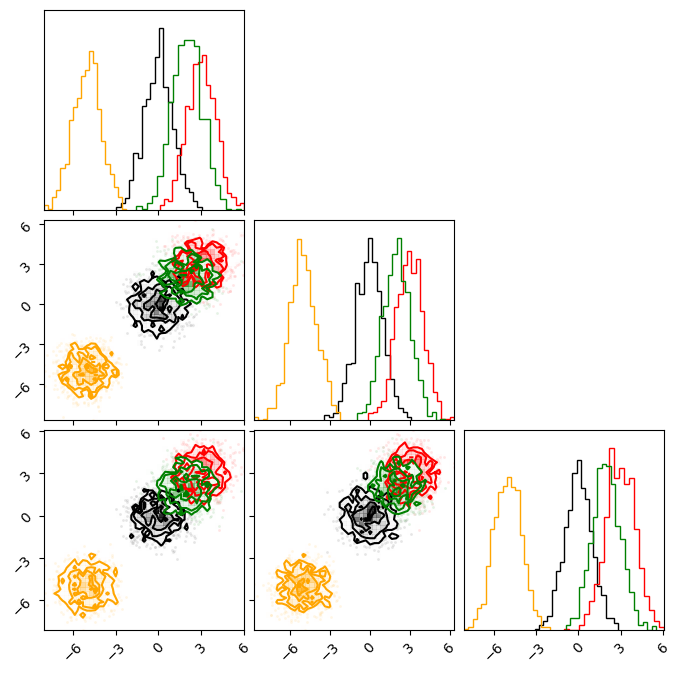

In [14]:
mode_1 = np.random.normal(0, 1, (num_samples, num_dim))
mode_2 = np.random.normal(3, 1, (num_samples, num_dim))
mode_3 = np.random.normal(2, 1, (num_samples, num_dim))
mode_4 = np.random.normal(-5, 1, (num_samples, num_dim))
corner.corner(mode_1);
corner.corner(mode_2, fig=plt.gcf(), color="red");
corner.corner(mode_3, fig=plt.gcf(), color="green");
corner.corner(mode_4, fig=plt.gcf(), color="orange");

In [15]:
get_R(np.transpose(np.stack([mode_1, mode_2, mode_3, mode_4]), (1, 0, 2)))

array([13.40841936, 13.09874724, 13.86768849])